In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
yelp_business = pd.read_json(r'C:\Users\Owais\Documents\Data Science Course\CIND820\yelp_dataset\yelp_academic_dataset_business.json', lines = True)
yelp_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [3]:
business = yelp_business

business = business[['business_id', 'name', 'is_open', 'stars', 'review_count', 'categories', 'attributes', 'state', 'city', 'latitude', 'longitude']]
business.head()


,business_id,name,is_open,stars,review_count,categories,attributes,state,city,latitude,longitude
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,1,4.0,86,"Gastropubs, Food, Beer Gardens, Restaurants, B...","{'RestaurantsTableService': 'True', 'WiFi': 'u...",CO,Boulder,40.017544,-105.283348
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,1,4.0,126,"Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...",OR,Portland,45.588906,-122.593331
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,1,4.5,13,"Antiques, Fashion, Used, Vintage & Consignment...","{'BusinessAcceptsCreditCards': 'True', 'Restau...",OR,Portland,45.511907,-122.613693
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,1,3.0,8,"Beauty & Spas, Hair Salons","{'RestaurantsPriceRange2': '1', 'BusinessAccep...",FL,Orange City,28.914482,-81.295979
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1,4.0,14,"Gyms, Active Life, Interval Training Gyms, Fit...","{'GoodForKids': 'False', 'BusinessParking': '{...",GA,Atlanta,33.747027,-84.353424


In [4]:
print(business.shape,business.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160585 entries, 0 to 160584
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   160585 non-null  object 
 1   name          160585 non-null  object 
 2   is_open       160585 non-null  int64  
 3   stars         160585 non-null  float64
 4   review_count  160585 non-null  int64  
 5   categories    160470 non-null  object 
 6   attributes    145593 non-null  object 
 7   state         160585 non-null  object 
 8   city          160585 non-null  object 
 9   latitude      160585 non-null  float64
 10  longitude     160585 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 13.5+ MB
(160585, 11) None


In [5]:
business.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,is_open,stars,review_count,latitude,longitude
count,160585.00,160585.00,160585.00,160585.00,160585.00
mean,0.77,3.66,51.96,38.76,-94.27
std,0.42,0.94,130.03,7.14,19.98
min,0.00,1.00,5.00,28.00,-123.39
25%,1.00,3.00,8.00,30.36,-122.59
50%,1.00,4.00,17.00,42.18,-84.38
75%,1.00,4.50,44.00,45.46,-81.29
max,1.00,5.00,9185.00,49.49,71.11


Text(0.5, 0, 'Star Ratings ')

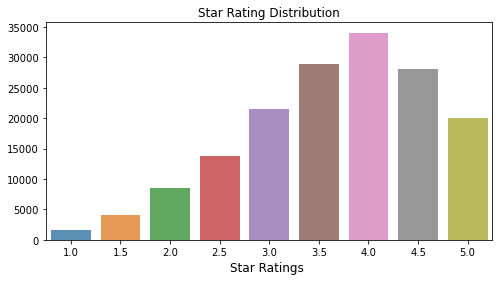

In [6]:
x=business['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax=sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)


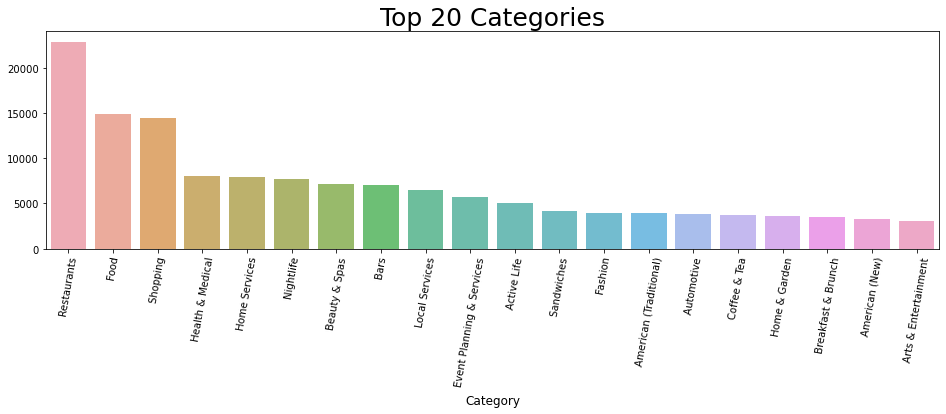

In [7]:
business_cats = ''.join(business['categories'].astype('str'))

cats=pd.DataFrame(business_cats.split(','),columns=['categories'])
x=cats.categories.value_counts()

x=x.sort_values(ascending=False)
x=x.iloc[0:20]

plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Top 20 Categories",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('', fontsize=12)
plt.xlabel('Category', fontsize=12)

plt.show()

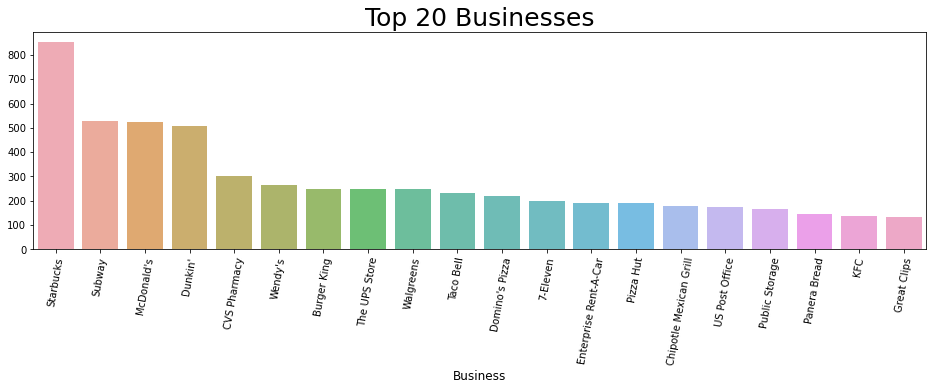

In [8]:
x=business.name.value_counts()

x=x.sort_values(ascending=False)
x=x.iloc[0:20]

plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Top 20 Businesses",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('', fontsize=12)
plt.xlabel('Business', fontsize=12)

plt.show()

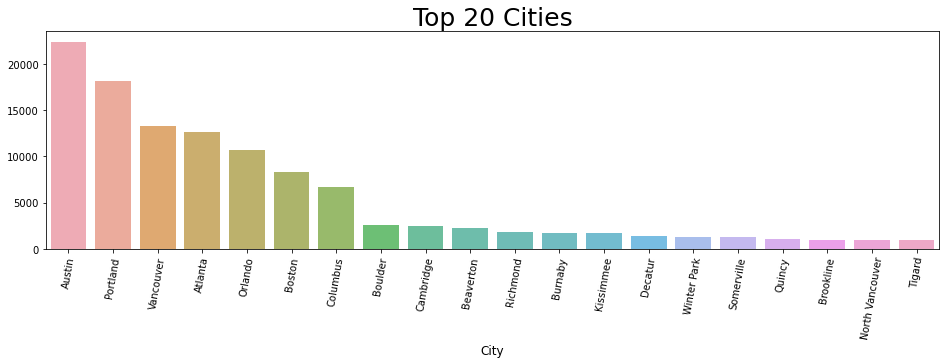

In [9]:
x=business.city.value_counts()

x=x.sort_values(ascending=False)
x=x.iloc[0:20]

plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Top 20 Cities",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('', fontsize=12)
plt.xlabel('City', fontsize=12)

plt.show()